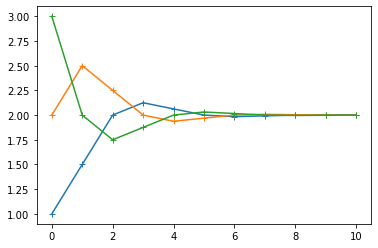

2.0

In [2]:
import numpy as np
import pandas as pd
import xlrd
from sklearn import preprocessing
import matplotlib.pyplot as plt

# 把邻接矩阵excel里面的数据存储到邻接矩阵里面
def excel_to_matrix(path):
    table = xlrd.open_workbook(path).sheets()[0]#获取第一个sheet表
    row = table.nrows  # 行数
    col = table.ncols  # 列数
    datamatrix = np.zeros((row, col))#生成一个nrows行ncols列，且元素均为0的初始矩阵
    for x in range(col):
        cols = np.matrix(table.col_values(x))  # 把list转换为矩阵进行矩阵操作
        datamatrix[:, x] = cols # 按列把数据存进矩阵中
    #数据归一化   
    min_max_scaler = preprocessing.MinMaxScaler()
    datamatrix  = min_max_scaler.fit_transform(datamatrix)
    return datamatrix

datafile = 'input3.xlsx'
A = excel_to_matrix(datafile) # 邻接矩阵 A Adjacency_matrix


# 使用最简单的平均值算法通过A计算Q
def A_to_Q_matrix(A):
    row = A.shape[0]  # 行数
    col = A.shape[1]  # 列数
    Q = np.zeros((row, col))#生成一个nrows行ncols列，且元素均为0的初始矩阵

    #每一横行的元素分别除以本行所有元素的和
    for y in range(row):
        for x in range(col):
            Q[y,:] = A[y,:]/sum(A[y,:])
    return Q
Q = A_to_Q_matrix(A)

# 固定次数迭代函数
def Iteration_Fixed_Time (P,Count):
    P_trans = np.transpose(P)
    P_Length = len(P)
    # 使用Q和初始值进行迭代P(n+1)=P(n)*(Q)
    P_All = np.zeros((Count+1, P_Length))
    P_All[0,:] = np.transpose(P_trans)
    for i in range(Count):
        P_trans = Q.dot(P_trans)
        P_All[i+1,:] = np.transpose(P_trans)
    return P_All
# 读入初始值P
P = [1,2,3]
P_Length = len(P)
Times = 10
P_All=Iteration_Fixed_Time(P,Times)
# 画图 每个节点的变量随着迭代次数的曲线图
x = range(Times+1) # 横轴 迭代次数
Y = np.transpose(P_All)
for i in range(P_Length):
    plt.plot(x,Y[i],'+-')
plt.show()

np.mean(P)

In [ ]:
import numpy as np
import pandas as pd
import xlrd
from sklearn import preprocessing
import matplotlib.pyplot as plt

# 把邻接矩阵excel里面的数据存储到邻接矩阵里面
def excel_to_matrix(path):
    table = xlrd.open_workbook(path).sheets()[0]#获取第一个sheet表
    row = table.nrows  # 行数
    col = table.ncols  # 列数
    datamatrix = np.zeros((row, col))#生成一个nrows行ncols列，且元素均为0的初始矩阵
    for x in range(col):
        cols = np.matrix(table.col_values(x))  # 把list转换为矩阵进行矩阵操作
        datamatrix[:, x] = cols # 按列把数据存进矩阵中
    #数据归一化   
    min_max_scaler = preprocessing.MinMaxScaler()
    datamatrix  = min_max_scaler.fit_transform(datamatrix)
    return datamatrix

datafile = 'input.xlsx'
A = excel_to_matrix(datafile) # 邻接矩阵 A Adjacency_matrix


# 使用最简单的平均值算法通过A计算Q
def A_to_Q_matrix(A):
    row = A.shape[0]  # 行数
    col = A.shape[1]  # 列数
    Q = np.zeros((row, col))#生成一个nrows行ncols列，且元素均为0的初始矩阵

    #每一横行的元素分别除以本行所有元素的和
    for y in range(row):
        for x in range(col):
            Q[y,:] = A[y,:]/sum(A[y,:])
    return Q
Q = A_to_Q_matrix(A)

# 固定次数迭代函数
def Iteration_Fixed_Time (P,Count):
    P_trans = np.transpose(P)
    P_Length = len(P)
    # 使用Q和初始值进行迭代P(n+1)=P(n)*(Q)
    P_All = np.zeros((Count+1, P_Length))
    P_All[0,:] = np.transpose(P_trans)
    for i in range(Count):
        P_trans = Q.dot(P_trans)
        P_All[i+1,:] = np.transpose(P_trans)
    return P_All
# 读入初始值P
P = [2,2,2,4]
P_Length = len(P)
Times = 10
P_All=Iteration_Fixed_Time(P,Times)
# 画图 每个节点的变量随着迭代次数的曲线图
x = range(Times+1) # 横轴 迭代次数
Y = np.transpose(P_All)
for i in range(P_Length):
    plt.plot(x,Y[i],'+-')
plt.show()

np.mean(P)